<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Image%20Classification%20with%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from zipfile import ZipFile
file_name = "archive(5).zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout

from keras.models import Sequential


Import Dataset

In [8]:
import pandas as pd
df_train = pd.read_csv('/content/Fast_Furious_Insured/train.csv')
df_train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [9]:
df_test = pd.read_csv('/content/Fast_Furious_Insured/test.csv')

Preparing images

In [10]:
def prepareImages(data, m, dataset):
  print('Preparing images')
  X_train = np.zeros((m, 100, 100, 3))
  count = 0
  for fig in data['Image_path']:
    #load images into Images of the size 100x100x3
    img = image.load_img('/content/Fast_Furious_Insured/' + dataset + '/' + fig, 
                         target_size = (100, 100, 3))
    
    x = image.img_to_array(img)
    x = preprocess_input(x)

    X_train[count] = x
    if (count%500==0):
      print('Preprocessing image:', count + 1, ",", fig)

    count +=1

  return X_train     


Preparation of Labels

In [11]:
def prepare_labels(y):
  values = np.array(y)
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)

  onehot_encoder = OneHotEncoder(sparse = False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)


  y = onehot_encoded
  return y, label_encoder

Normalize the data

In [12]:
X = prepareImages(df_train, df_train.shape[0], "trainImages")

X/=255

Preparing images
Preprocessing image: 1 , img_4513976.jpg
Preprocessing image: 501 , img_4637617.jpg
Preprocessing image: 1001 , img_4515853.jpg


Let's look at some samples

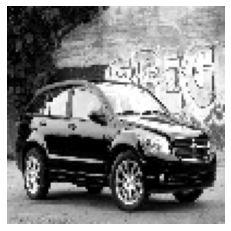

In [33]:
plt.imshow(X[0][:,:,0], cmap="gray")
plt.axis("off")
plt.show()

Label Encoding

In [13]:
y, label_encoder = prepare_labels(df_train['Condition'])

y.shape

(1399, 2)

Implementing 

In [14]:
model = Sequential()

model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool'))
model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3), name='avg_pool'))

model.add(Flatten())
model.add(Dense(500, activation="relu", name='rl'))
model.add(Dropout(0.8))
model.add(Dense(y.shape[1], activation='softmax', name='sm'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 94, 94, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 94, 94, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 94, 94, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 47, 47, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 45, 45, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 45, 45, 64)        0         
_________________________________________________________________
avg_pool (AveragePooling2D)  (None, 15, 15, 64)        0

In [15]:
history = model.fit(X, y, epochs = 25, batch_size = 100, verbose = 1) 



Epoch 1/25
14/14 [==============================] - 45s 2s/step - loss: 2.1111 - accuracy: 0.8320
Epoch 2/25
14/14 [==============================] - 26s 2s/step - loss: 0.4452 - accuracy: 0.9200
Epoch 3/25
14/14 [==============================] - 25s 2s/step - loss: 0.3065 - accuracy: 0.9325
Epoch 4/25
14/14 [==============================] - 25s 2s/step - loss: 0.2640 - accuracy: 0.9317
Epoch 5/25
14/14 [==============================] - 25s 2s/step - loss: 0.2579 - accuracy: 0.9316
Epoch 6/25
14/14 [==============================] - 26s 2s/step - loss: 0.2447 - accuracy: 0.9272
Epoch 7/25
14/14 [==============================] - 26s 2s/step - loss: 0.2288 - accuracy: 0.9293
Epoch 8/25
14/14 [==============================] - 26s 2s/step - loss: 0.2093 - accuracy: 0.9303
Epoch 9/25
14/14 [==============================] - 26s 2s/step - loss: 0.2029 - accuracy: 0.9270
Epoch 10/25
14/14 [==============================] - 26s 2s/step - loss: 0.1733 - accuracy: 0.9369
Epoch 11/25
14/14 [

Evaluate the model

Plot the accuracy curve for training

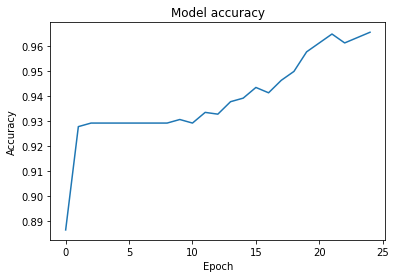

In [17]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Plot the loss curve for training

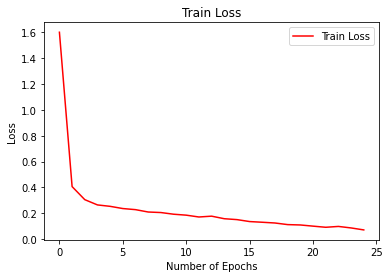

In [18]:
plt.plot(history.history['loss'], color='r', label="Train Loss")
plt.title("Train Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [19]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])

Train accuracy of the model:  0.9656897783279419


In [20]:
print('Train loss of the model: ',history.history['loss'][-1])


Train loss of the model:  0.07189340144395828


Predict Test Data

In [22]:
test = os.listdir("/content/Fast_Furious_Insured/testImages")
print(len(test))

600


In [24]:
col = ['Image_path']
test_data = pd.DataFrame(test, columns=col)
test_data['Condition'] = ''

In [26]:
x_test = prepareImages(df_test, df_test.shape[0], "testImages")
x_test /= 255

Preparing images
Preprocessing image: 1 , img_4538519.jpg
Preprocessing image: 501 , img_4634976.jpg


In [27]:
predictions = model.predict(np.array(x_test), verbose=1)

19/19 [==============================] - 4s 161ms/step
